# Redes Neuronales Multicapa y Backpropagation

## Introducción
Las **Redes Neuronales Multicapa (RNM)** son modelos computacionales inspirados en el funcionamiento del cerebro humano. Se utilizan para resolver problemas complejos de clasificación, regresión y reconocimiento de patrones.

Una RNM está compuesta por **tres tipos de capas**:
1. **Capa de entrada:** Recibe los datos de entrada.
2. **Capas ocultas:** Procesan la información y extraen características relevantes.
3. **Capa de salida:** Genera la predicción final.

El entrenamiento de una RNM se realiza mediante el algoritmo de **Backpropagation**, que ajusta los pesos de la red utilizando la regla de descenso de gradiente.

En este tutorial, aprenderemos la teoría detrás de las RNM y su implementación en Python utilizando `scikit-learn`.


## Fundamentos Teóricos

### 1. Neuronas y Función de Activación
Cada neurona en una red recibe múltiples entradas, las multiplica por pesos, les suma un sesgo (bias) y aplica una **función de activación** para generar una salida.

Matemáticamente, la salida de una neurona se expresa como:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

Donde:
- \( $x_i$ \) son las entradas.
- \( $w_i$ \) son los pesos sinápticos.
- \( $b$ \) es el bias.
- \( $f$ \) es la función de activación.

Algunas funciones de activación comunes son:
- **Sigmoide:**  
  $$ f(x) = \frac{1}{1 + e^{-x}} $$
- **ReLU:**  
  $$ f(x) = \max(0, x) $$
- **Tangente hiperbólica (tanh):**  
  $$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

### 2. Arquitectura de una Red Neuronal Multicapa
Una **RNM** está compuesta por múltiples capas de neuronas totalmente conectadas. La información fluye desde la capa de entrada, pasa por las capas ocultas y llega a la capa de salida.

Cada capa aplica transformaciones lineales y no lineales para aprender representaciones más complejas de los datos.

### 3. Algoritmo de Backpropagation
El **Backpropagation** es el algoritmo de entrenamiento más usado en RNM. Funciona en dos fases:

1. **Forward Propagation (Propagación hacia adelante):** Calcula la salida de la red utilizando los pesos actuales.
2. **Backward Propagation (Retropropagación):** Ajusta los pesos usando la **Regla de la Cadena** y el **Descenso de Gradiente** para minimizar el error.

El error se mide con una **función de pérdida**, como el **Error Cuadrático Medio (MSE)** o la **Entropía Cruzada**.

El ajuste de los pesos se realiza con la ecuación:

$$
w = w - \eta \frac{\partial L}{\partial w}
$$

Donde:
- \($ \eta$ \) es la tasa de aprendizaje.
- \( $\frac{\partial L}{\partial w}$ \) es el gradiente de la función de pérdida \($ L $\) respecto a los pesos \($ w $\).

# Preprocesamiento del Dataset Iris

## 1. Descripción del Dataset
El **Dataset Iris** es un conjunto de datos clásico en el aprendizaje automático. Contiene **150 muestras** de flores de iris con **cuatro características**:

- **Sepal length (cm)** - Longitud del sépalo.
- **Sepal width (cm)** - Ancho del sépalo.
- **Petal length (cm)** - Longitud del pétalo.
- **Petal width (cm)** - Ancho del pétalo.

Cada muestra pertenece a una de **tres clases de especies**:
- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

Este dataset se encuentra incluido en `scikit-learn` y es ampliamente utilizado para experimentos de clasificación.

## 2. Carga y Visualización de Datos
Ahora cargaremos el dataset Iris y mostraremos un resumen de los datos.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Cargar el dataset Iris de scikit-learn
iris = datasets.load_iris()

# Convertir a DataFrame de Pandas para mejor manipulación
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target  # Agregar la columna de etiquetas

# Reemplazar números de clases con nombres de especies
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# Mostrar las primeras filas del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Gráfico de Dispersión
Para visualizar la relación entre las características del dataset, generaremos un **gráfico de dispersión** de las longitudes y anchos de los sépalos y pétalos.


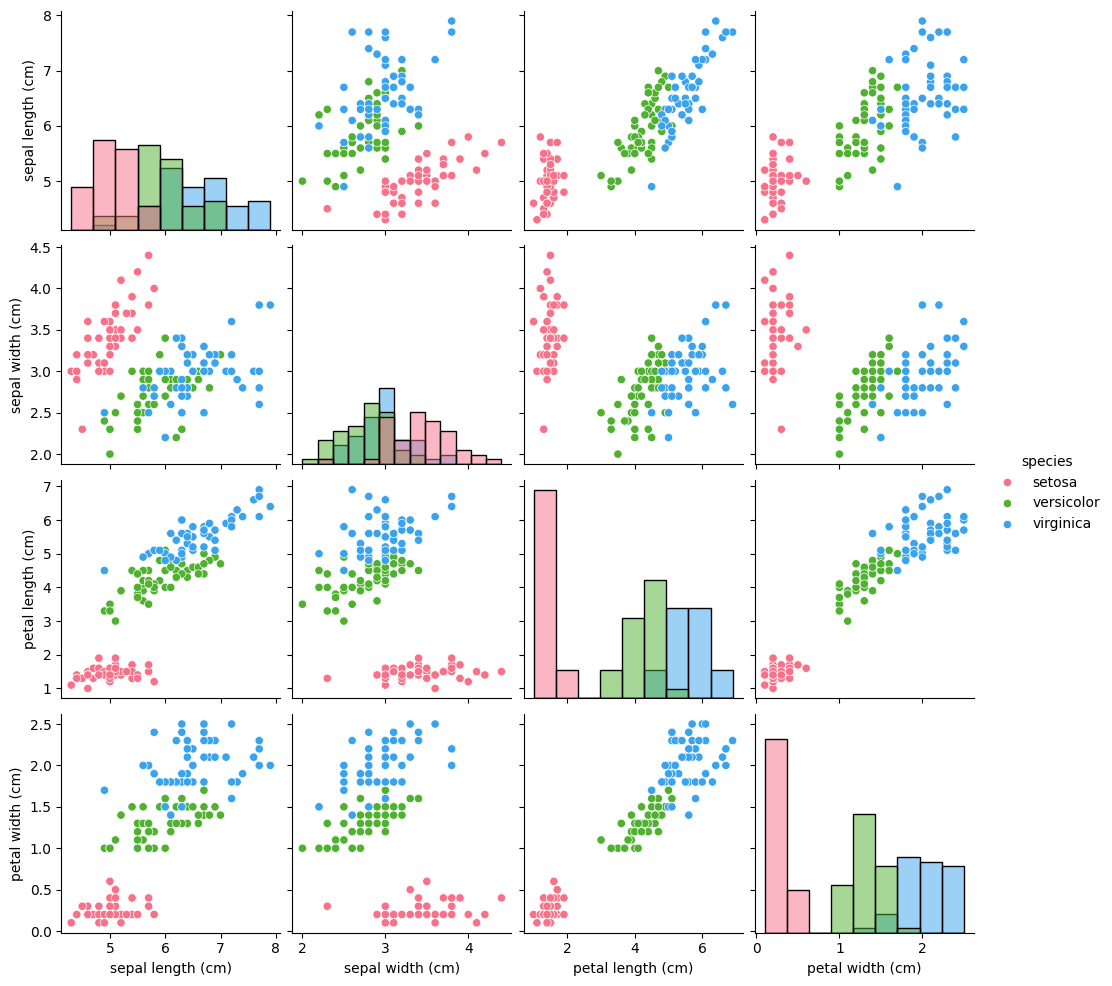

In [27]:
# Gráfico de dispersión con Seaborn
sns.pairplot(df, hue="species", diag_kind="hist", palette="husl")
plt.show()

# Feature Engineering

El **Feature Engineering** es el proceso de transformar los datos brutos en características más representativas para mejorar el desempeño del modelo.  

En este caso, exploraremos la relación entre las características de las flores de iris mediante:
1. **Pairplot**: Un gráfico de pares que muestra la distribución y relaciones entre las características.  
2. **Heatmap**: Un mapa de calor de la matriz de correlación entre las características.


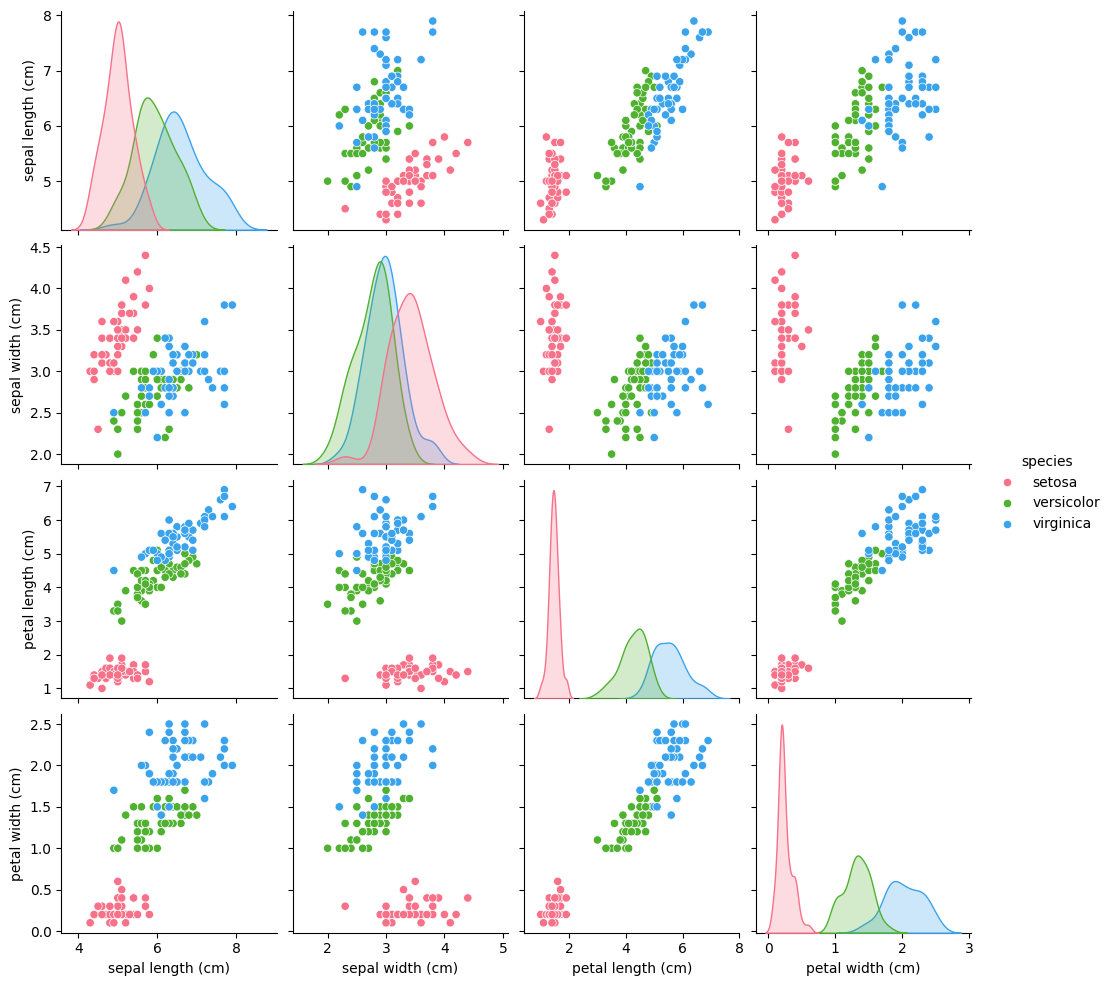

In [28]:
# Pairplot: Relación entre características por especie
sns.pairplot(df, hue="species", palette="husl")
plt.show()

## Heatmap de Correlación

El **mapa de calor (Heatmap)** nos ayuda a visualizar la correlación entre las características numéricas.  
Una correlación alta indica que dos características tienen una relación lineal fuerte, lo cual puede ser útil para la selección de características.


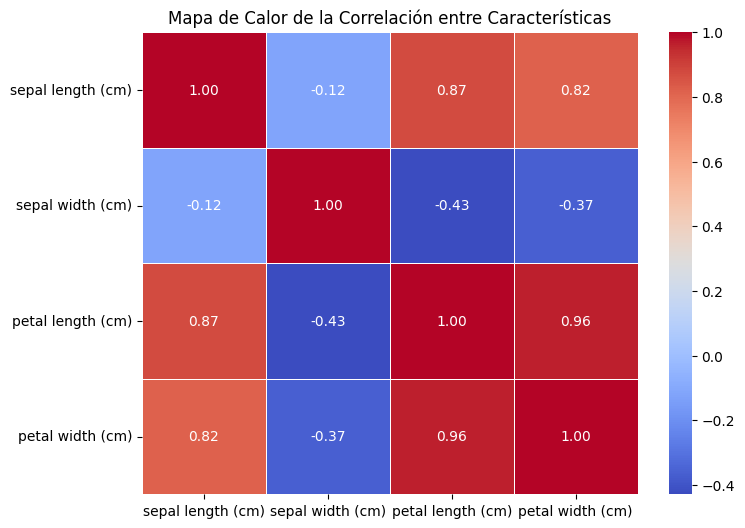

In [29]:
# Matriz de correlación
corr_matrix = df.drop(columns="species").corr()

# Generar el Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de la Correlación entre Características")
plt.show()

# Entrenamiento del Modelo

Para entrenar nuestra **Red Neuronal Multicapa (RNM)** utilizaremos la clase `MLPClassifier` de `scikit-learn`.

## 1. ¿Qué es MLPClassifier?
El **MLPClassifier** (Multi-Layer Perceptron Classifier) es un modelo de red neuronal que utiliza **Backpropagation** para ajustar los pesos.

Algunos parámetros importantes:
- `hidden_layer_sizes`: Número de neuronas en las capas ocultas. Ejemplo: `(10, 5)` crea dos capas con 10 y 5 neuronas.
- `activation`: Función de activación, puede ser:
  - `'relu'` (ReLU)
  - `'logistic'` (sigmoide)
  - `'tanh'` (tangente hiperbólica)
- `solver`: Algoritmo de optimización (`'adam'`, `'sgd'`, `'lbfgs'`).
- `learning_rate`: Controla el tamaño de los pasos en el descenso de gradiente.
- `max_iter`: Número máximo de iteraciones para entrenar la red.


In [34]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Separar características (X) y etiquetas (y)
X = df.drop(columns="species")  # Variables independientes
y = df["species"]  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (es recomendable para RNM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation="logistic", solver="adam", max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)

# Mostrar el estado del entrenamiento
print("Entrenamiento completado.")

Entrenamiento completado.


## 2. Explicación del Código
1. **Separamos las características (`X`) y las etiquetas (`y`)**.
2. **Dividimos los datos en entrenamiento y prueba (80%-20%)** con `train_test_split()`.
3. **Normalizamos los datos** usando `StandardScaler()` para mejorar la estabilidad del entrenamiento.
4. **Creamos y entrenamos el modelo** con `MLPClassifier()`:
   - `hidden_layer_sizes=(10, 5)`: Dos capas ocultas con 10 y 5 neuronas.
   - `activation="logistic"`: Función de activación Sigmoide.
   - `solver="adam"`: Algoritmo de optimización Adam.
   - `max_iter=2000`: Número máximo de iteraciones de entrenamiento.
5. **Entrenamos el modelo con `.fit(X_train, y_train)`**.


# Evaluación del Modelo

Una vez entrenado el modelo, es importante evaluar su desempeño utilizando diferentes métricas:

1. **Accuracy**: Mide la proporción de predicciones correctas sobre el total de muestras.
2. **Matriz de Confusión**: Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
3. **Classification Report**: Proporciona métricas como *precision, recall, f1-score* y *support*.

Ahora, evaluaremos el modelo con el conjunto de prueba (`X_test, y_test`).


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

# 2. Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred)
print("\nInforme de clasificación:")
print(class_report)

Accuracy del modelo: 1.0000

Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Informe de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Interpretación de las métricas

1. **Accuracy**: Representa el porcentaje de predicciones correctas. Un valor cercano a 1.0 indica un modelo bien entrenado.

2. **Matriz de Confusión**: Es una tabla que muestra:
   - **Filas**: Clases reales.
   - **Columnas**: Clases predichas.
   - Elementos en la diagonal representan aciertos.
   - Valores fuera de la diagonal representan errores.

3. **Informe de clasificación ( Classification Report )**:
   - **Precision**: Qué porcentaje de predicciones positivas fueron correctas.
   - **Recall**: Qué porcentaje de ejemplos positivos fueron identificados correctamente.
   - **F1-score**: Media armónica entre precisión y recall (balance entre ambos).
   - **Support**: Número de muestras reales por clase.

Si el modelo tiene valores altos de *precision, recall y f1-score*, significa que clasifica correctamente la mayoría de los ejemplos.


# Visualización de la Matriz de Confusión con Heatmap

Para comprender mejor los errores y aciertos del modelo, podemos visualizar la **Matriz de Confusión** usando un **heatmap** de `seaborn`.

- Las **filas** representan las clases reales.
- Las **columnas** representan las clases predichas.
- Los valores en la diagonal indican las predicciones correctas.
- Los valores fuera de la diagonal muestran los errores del modelo.

A continuación, generamos la matriz de confusión y la representamos gráficamente.


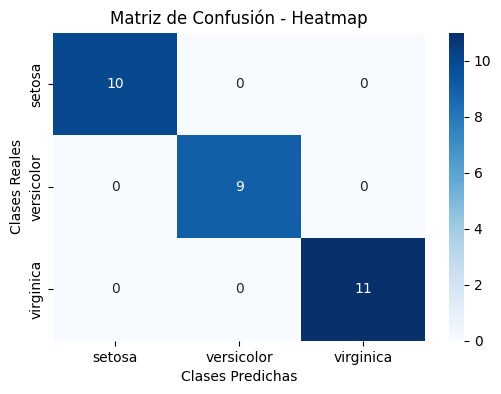

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión - Heatmap")
plt.show()

## Interpretación del Heatmap

- **Celdas en la diagonal (🔵 azul oscuro):** Representan las predicciones correctas.
- **Celdas fuera de la diagonal (🔷 tonos claros):** Representan los errores del modelo.
- Si el modelo es bueno, los valores fuera de la diagonal serán **cercanos a cero**.